In [115]:
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

In [116]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=32)  # middle/hidden layer
        self.fc2 = nn.Linear(in_features=32, out_features=10)  # output layer
    
    def forward(self, x):
        x = x.squeeze(1)
        x = x.flatten(1,2)
        x = self.fc1(x)   
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [117]:
model = Net()
sample_input = torch.rand(50, 1, 28, 28)  # sample batch input
sample_output = model(sample_input)
sample_output[0]

tensor([-2.1858, -2.2881, -2.3612, -2.2172, -2.5162, -1.9593, -2.3555, -2.4350,
        -2.4592, -2.3725], grad_fn=<SelectBackward>)

In [118]:
train_loader = torch.utils.data.DataLoader(
    dataset=datasets.MNIST(root='./data', train=True, download=True,
        transform=transforms.ToTensor()),
    batch_size=50, shuffle=True
)

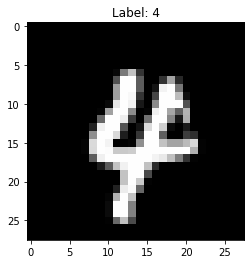

In [137]:
sample = iter(train_loader).next()
sample_label = sample[1][0]
sample_image = sample[0][0]
sample_image = sample_image.permute(1,2,0).squeeze(-1).numpy()
plt.title(f'Label: {sample_label}')
plt.imshow(sample_image, cmap='gray')

In [21]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)

In [22]:
def train(num_epochs=10):
    for epoch in range(num_epochs):
        for data, label in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, label)
            loss.backward()
            optimizer.step()
        print(loss)
train()

tensor(2.2807, grad_fn=<NllLossBackward>)
tensor(2.2737, grad_fn=<NllLossBackward>)
tensor(2.1842, grad_fn=<NllLossBackward>)
tensor(2.2084, grad_fn=<NllLossBackward>)
tensor(2.2271, grad_fn=<NllLossBackward>)
tensor(2.3144, grad_fn=<NllLossBackward>)
tensor(2.1276, grad_fn=<NllLossBackward>)
tensor(2.0551, grad_fn=<NllLossBackward>)
tensor(1.9450, grad_fn=<NllLossBackward>)
tensor(2.0449, grad_fn=<NllLossBackward>)
